In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import joblib

In [24]:
df=pd.read_csv('../data/processed.csv')
df

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result_Encoded
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


In [25]:
X=df.drop(columns='Result_Encoded',axis=1)
y=df['Result_Encoded']

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2,random_state=100)

In [40]:
model=LogisticRegression(max_iter=1000)

In [41]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1], shape=(1056,))

In [42]:
print("accuracy_score:",accuracy_score(y_test,y_pred))
print("confusion_matrix:",confusion_matrix(y_test,y_pred))
print("report:",classification_report(y_test,y_pred))

accuracy_score: 0.7878787878787878
confusion_matrix: [[310  94]
 [130 522]]
report:               precision    recall  f1-score   support

           0       0.70      0.77      0.73       404
           1       0.85      0.80      0.82       652

    accuracy                           0.79      1056
   macro avg       0.78      0.78      0.78      1056
weighted avg       0.79      0.79      0.79      1056



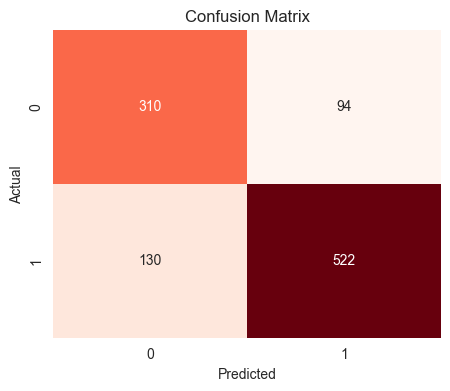

In [43]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [44]:
joblib.dump(model,"../models/model.1.pkl")

['../models/model.1.pkl']